# First model

This model is the simplest possible model we can think of. Inputs will be the list of points delimiting the bone and tooth area and their squares and cross-products to account for second order contributions.

The outputs will be the coordinates of optimal axe.

The cost function is the distance of the two points. 

## First step: load and prepare the datasets

Loads the datasets prepared by the `dataset_gen` notebook, then prepare the input by appending all the cross-products.

In [422]:
import pandas as pd
from utils import datadir

input_dataset = pd.read_pickle(datadir("input_rot.pkl"))
output_dataset = pd.read_pickle(datadir("output_rot.pkl"))

In [423]:
input_dataset

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.516425,1.904407,2.830124,-1.441737,1.326225,-2.493799,-1.174322,0.549347,-0.698353,3.384424,0.434217,1.870214,-1.092114,0.583540,-2.366667,2.263976
1,0.190749,2.636898,1.990407,-1.145306,-0.084083,-1.826785,-1.415641,1.752770,-0.374559,4.436448,0.207304,2.576463,-1.432195,1.813204,-2.415939,3.634099
2,0.763316,2.400042,0.899236,-1.236279,-1.067384,-1.680220,-1.266553,2.676438,0.577066,4.476345,0.834169,2.682152,-1.337407,2.394327,-1.247849,4.596625
3,2.721627,0.011318,-0.064539,-3.122918,-1.379603,-1.771914,0.969613,1.228005,3.831253,1.451021,2.677371,0.037996,1.013869,1.201328,2.427678,2.855380
4,1.358551,2.593314,1.815764,-1.247205,0.037793,-1.679343,-0.809907,2.372996,0.934270,4.690807,1.261360,2.574946,-0.712716,2.391365,-1.038083,4.221932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.561810,2.416841,1.728431,-0.158547,0.361340,-1.620670,-2.655468,0.725439,-2.947575,3.593161,-1.616090,2.356256,-2.601187,0.786025,-4.423227,2.009868
996,2.516807,1.616279,0.044194,-1.592231,-1.548466,-0.247470,0.992358,2.778237,3.876662,3.173724,2.444416,1.525986,1.064749,2.868529,2.139221,4.337900
997,-0.266827,2.010331,0.778407,-1.728121,-0.968680,-2.406388,-2.333855,1.483393,-0.849080,3.906419,-0.447146,2.096965,-2.153536,1.396759,-2.956806,3.401421
998,-0.218928,3.232466,1.253863,-0.662542,-0.875507,-1.191209,-1.891129,2.516926,-0.694903,5.077147,-0.136472,3.195135,-1.973586,2.554258,-2.659362,4.473817


In [424]:
output_dataset

,0,1,2,3
0,1.275800,-0.902886,-0.930729,2.025539
1,0.431293,-0.259086,-1.003847,3.115054
2,-0.139922,-0.126086,-0.293505,3.537362
3,0.133826,-1.425057,2.487543,1.386431
4,0.709293,-0.147797,0.111208,3.469762
...,...,...,...,...
995,-0.006289,-0.069359,-2.897020,2.186327
996,0.083437,0.119185,2.381262,2.976535
997,-0.496871,-0.795882,-1.601642,2.700391
998,-0.225558,0.340315,-1.366081,3.825089


In [425]:
import numpy as np
from typing import Iterator
from itertools import permutations


def shuffle_points(s: np.ndarray) -> Iterator[np.ndarray]:
    for p1 in permutations(range(4)):
        for p2 in permutations(range(4, 8)):
            yield np.array(
                [[s[i * 2], s[i * 2 + 1]] for i in p1] + [[s[i * 2], s[i * 2 + 1]] for i in
                                                          p2]).reshape(-1)


from utils import add_cross_prods


def prepare_input(orig: pd.DataFrame) -> Iterator[np.ndarray]:
    for row in orig.to_numpy():
        for s in shuffle_points(row):
            x = add_cross_prods(s)
            yield x

In [426]:
prepared_input = np.array([r for r in prepare_input(input_dataset)])

In [427]:
prepared_input

array([[ 0.51642464,  1.90440743,  2.83012391, ..., -1.38104511,
         1.32112082, -5.35807582],
       [ 0.51642464,  1.90440743,  2.83012391, ..., -2.47252066,
         1.32112082, -0.63729269],
       [ 0.51642464,  1.90440743,  2.83012391, ..., -4.42617395,
         4.23411988, -5.35807582],
       ...,
       [-1.22443494,  0.94096412,  1.3184459 , ..., -1.3510691 ,
         4.83294919, -4.52351324],
       [-1.22443494,  0.94096412,  1.3184459 , ...,  1.26917144,
         9.51554081,  0.7463512 ],
       [-1.22443494,  0.94096412,  1.3184459 , ..., -2.66010518,
         9.51554081, -4.52351324]])

In [428]:
input_dim = prepared_input.shape[1]
input_dim

136

In [429]:
prepared_output = output_dataset.to_numpy()
display(prepared_output.shape)
prepared_output = np.repeat(prepared_output, repeats=576, axis=0)
output_dim = prepared_output.shape[1]
display(prepared_output.shape)
display(output_dim)

(1000, 4)

(576000, 4)

4

## Now prepare the network

Only one layer with linear output.

In [430]:
import tensorflow as tf

model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(input_dim))
model.add(tf.keras.layers.Dense(units=output_dim, activation=tf.keras.activations.linear))
model.output_shape

(None, 4)

#### Test the model

In [431]:
model(prepared_input)

<tf.Tensor: shape=(576000, 4), dtype=float32, numpy=
array([[  5.1302958 ,  -0.14054108,  -6.0109935 ,  -5.4307156 ],
       [  6.230429  ,   0.8472626 ,  -3.992612  ,  -4.4352913 ],
       [ 10.345779  ,   2.3973393 ,  -8.815542  ,  -7.1777644 ],
       ...,
       [ -1.9467354 ,  -1.1453438 ,  -0.2736677 ,  -5.1018724 ],
       [  0.8226056 ,   0.8773762 ,  -0.66226226,  -9.36401   ],
       [  1.1467433 ,   0.6006789 ,  -3.378408  , -10.390437  ]],
      dtype=float32)>

#### Optimizer

In [432]:
loss_function = tf.keras.losses.MeanSquaredError()

optimizer = tf.keras.optimizers.legacy.Adam()

In [433]:
train_loss = tf.keras.metrics.Mean(name='train_loss')


#### Setup training

In [434]:
@tf.function
def train_step(inputs, outputs):
    with tf.GradientTape() as tape:
        # training=True is only needed if there are layers with different
        # behavior during training versus inference (e.g. Dropout).
        predictions = model(inputs, training=True)
        loss = loss_function(outputs, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    train_loss(loss)

In [435]:
test_loss = tf.keras.metrics.Mean(name='test_loss')


@tf.function
def test_step(inputs, outputs):
    # training=False is only needed if there are layers with different
    # behavior during training versus inference (e.g. Dropout).
    predictions = model(inputs, training=False)
    t_loss = loss_function(outputs, predictions)

    test_loss(t_loss)

### Do the training



In [436]:
from typing import Tuple
import math


def train_model(EPOCHS=100, BATCH_SIZE=1000) -> pd.DataFrame:
    stats = pd.DataFrame(columns=["Train Loss", "Test Loss"])
    train_losses = np.ndarray(shape=[1])
    test_losses = np.ndarray(shape=[1])

    def init_epoch(inpts: np.ndarray, outs: np.ndarray) -> Tuple[
        Iterator[Tuple[tf.Tensor, tf.Tensor]], Iterator[Tuple[tf.Tensor, tf.Tensor]]]:
        indexes = np.arange(inpts.shape[0])
        np.random.shuffle(indexes)
        train_size = math.ceil(inpts.shape[0] * 9 / 10)
        train_indexes = indexes[0:train_size]
        test_indexes = indexes[train_size:-1]

        def read_batches(idx: np.ndarray, bs=BATCH_SIZE) -> Iterator[Tuple[tf.Tensor, tf.Tensor]]:
            for i in range(0, idx.shape[0], bs):
                ii = idx[i:(i + bs)]
                yield tf.convert_to_tensor(inpts[ii]), tf.convert_to_tensor(
                    outs[ii])

        return read_batches(train_indexes), read_batches(test_indexes)

    for epoch in range(EPOCHS):
        # Reset the metrics at the start of the next epoch
        train_loss.reset_states()
        test_loss.reset_states()

        train_ds, test_ds = init_epoch(prepared_input, prepared_output)

        for inputs, outputs in train_ds:
            train_step(inputs, outputs)

        for test_inputs, test_outputs in test_ds:
            test_step(test_inputs, test_outputs)

        train_losses = np.append(train_losses, [train_loss.result().numpy()])
        test_losses = np.append(test_losses, [test_loss.result().numpy()])

        if (epoch % 1 == 0):
            print(
                f'Epoch {epoch + 1}, '
                f'Loss: {train_loss.result()}, '
                f'Test Loss: {test_loss.result()}, '
            )

    stats["Train Loss"] = train_losses
    stats["Test Loss"] = test_losses
    return stats


stats = train_model()
display(stats)

Epoch 1, Loss: 3.941657304763794, Test Loss: 0.2813047468662262, 
Epoch 2, Loss: 0.12253496795892715, Test Loss: 0.048918984830379486, 
Epoch 3, Loss: 0.029688764363527298, Test Loss: 0.018002379685640335, 
Epoch 4, Loss: 0.0132948849350214, Test Loss: 0.009924303740262985, 
Epoch 5, Loss: 0.007997432723641396, Test Loss: 0.006466185208410025, 
Epoch 6, Loss: 0.0052755605429410934, Test Loss: 0.00424009608104825, 
Epoch 7, Loss: 0.0035119131207466125, Test Loss: 0.002839587861672044, 
Epoch 8, Loss: 0.002331543480977416, Test Loss: 0.0018800374818965793, 
Epoch 9, Loss: 0.0015296217752620578, Test Loss: 0.0012319101952016354, 
Epoch 10, Loss: 0.0009803175926208496, Test Loss: 0.0007638655952177942, 
Epoch 11, Loss: 0.0006069033988751471, Test Loss: 0.00046065551578067243, 
Epoch 12, Loss: 0.0003590752021409571, Test Loss: 0.0002669190871529281, 
Epoch 13, Loss: 0.00020365294767543674, Test Loss: 0.00015154034190345556, 
Epoch 14, Loss: 0.00011354265006957576, Test Loss: 8.9791297796182

,Train Loss,Test Loss
0,1000.000000,73.931671
1,3.941657,0.281305
2,0.122535,0.048919
3,0.029689,0.018002
4,0.013295,0.009924
...,...,...
96,0.000023,0.000006
97,0.000029,0.000038
98,0.000028,0.000055
99,0.000022,0.000012


## Plot stats

<Axes: >

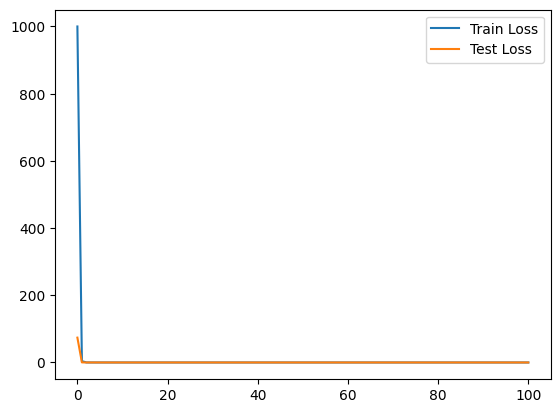

In [437]:
%matplotlib inline
stats.plot()

#### Some random tests

In [438]:
s1 = np.array([1, 1, -1, 1, -1, -1, 1, -1, 1, 1, 1, 2, -1, 2, -1, 1])
display(s1)
s1 = add_cross_prods(s1)
display(s1)
r1 = model(s1.reshape(1, -1))
display(r1)


array([ 1,  1, -1,  1, -1, -1,  1, -1,  1,  1,  1,  2, -1,  2, -1,  1])

array([ 1,  1, -1,  1, -1, -1,  1, -1,  1,  1,  1,  2, -1,  2, -1,  1,  1,
       -1,  1, -1, -1,  1, -1,  1,  1,  1,  2, -1,  2, -1,  1, -1,  1, -1,
       -1,  1, -1,  1,  1,  1,  2, -1,  2, -1,  1, -1,  1,  1, -1,  1, -1,
       -1, -1, -2,  1, -2,  1, -1, -1, -1,  1, -1,  1,  1,  1,  2, -1,  2,
       -1,  1,  1, -1,  1, -1, -1, -1, -2,  1, -2,  1, -1, -1,  1, -1, -1,
       -1, -2,  1, -2,  1, -1, -1,  1,  1,  1,  2, -1,  2, -1,  1, -1, -1,
       -1, -2,  1, -2,  1, -1,  1,  1,  2, -1,  2, -1,  1,  1,  2, -1,  2,
       -1,  1,  2, -1,  2, -1,  1, -2,  4, -2,  2, -2,  1, -1, -2,  2, -1])

<tf.Tensor: shape=(1, 4), dtype=float32, numpy=
array([[-0.08553331, -0.3498712 ,  0.09662097,  1.5551661 ]],
      dtype=float32)>

In [439]:
r1.numpy()

array([[-0.08553331, -0.3498712 ,  0.09662097,  1.5551661 ]],
      dtype=float32)

In [440]:
model.save(datadir("model_rot"))

INFO:tensorflow:Assets written to: model_rot/assets


INFO:tensorflow:Assets written to: model_rot/assets
